In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the common path
base_path = "/content/drive/MyDrive/Fall 2024/CS 2520/Cycle_Care_Data/"

# List of file names
file_names = [
    "202102-divvy-tripdata.csv",
    "202101-divvy-tripdata.csv",
    "202103-divvy-tripdata.csv",
    "202104-divvy-tripdata.csv",
    "202105-divvy-tripdata.csv",
    "202106-divvy-tripdata.csv",
    "202107-divvy-tripdata.csv",
    "202108-divvy-tripdata.csv",
    "202109-divvy-tripdata.csv",
    "202110-divvy-tripdata.csv",
    "202111-divvy-tripdata.csv",
    "202112-divvy-tripdata.csv"
]

# Read the CSV files into variables
df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12 = [pd.read_csv(base_path + file_name) for file_name in file_names]

In [ ]:
# Merging all the files into one file '"data"'
df = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]
data = pd.concat(df)
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,89E7AA6C29227EFF,classic_bike,2021-02-12 16:14:56,2021-02-12 16:21:43,Glenwood Ave & Touhy Ave,525,Sheridan Rd & Columbia Ave,660,42.012701,-87.666058,42.004583,-87.661406,member
1,0FEFDE2603568365,classic_bike,2021-02-14 17:52:38,2021-02-14 18:12:09,Glenwood Ave & Touhy Ave,525,Bosworth Ave & Howard St,16806,42.012701,-87.666058,42.019537,-87.669563,casual
2,E6159D746B2DBB91,electric_bike,2021-02-09 19:10:18,2021-02-09 19:19:10,Clark St & Lake St,KA1503000012,State St & Randolph St,TA1305000029,41.885795,-87.631101,41.884866,-87.627498,member
3,B32D3199F1C2E75B,classic_bike,2021-02-02 17:49:41,2021-02-02 17:54:06,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member
4,83E463F23575F4BF,electric_bike,2021-02-23 15:07:23,2021-02-23 15:22:37,State St & 33rd St,13216,Emerald Ave & 31st St,TA1309000055,41.834733,-87.625827,41.838163,-87.645123,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual
247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member
247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member
247538,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member


In [ ]:
data.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [ ]:
data.shape

(5595063, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5595063 entries, 0 to 247539
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 597.6+ MB


In [ ]:
# Cheking for duplicate values
data['ride_id'].duplicated().sum()

0

In [ ]:
# Checking for null values
data.isnull().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,690809
start_station_id,690806
end_station_name,739170
end_station_id,739170
start_lat,0
start_lng,0


In [ ]:
data.isna().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,690809
start_station_id,690806
end_station_name,739170
end_station_id,739170
start_lat,0
start_lng,0


In [ ]:
# Calculating the percentage of null values
print('The percentage of missing values is:',round((data.isna().sum().max() * 100)/data.shape[0],2),'%')

The percentage of missing values is: 13.21 %


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5595063 entries, 0 to 247539
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 597.6+ MB


In [ ]:
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])

In [ ]:
false_dates = data.loc[(data['started_at'] > data['ended_at'])]
false_dates.shape

#deleting the wrong entries
data = data.drop(false_dates.index.to_list()).copy()

(147, 13)

There are 145 wrong entries where the 'started_at' column has a datetime value lower than the correspondent 'ended_at' value. This is not possible since the start of the trip hast to be an earlier date and time than the end of the trip.

In [ ]:
#deleting the wrong entries
data = data.drop(false_dates.index.to_list()).copy()

Adding Columns

In [ ]:
data['ride_length_min'] = ((data['ended_at'] - data['started_at'])/pd.Timedelta(minutes=1)).astype('int32')

In [ ]:
# Creating the name of the day of the week
data['day'] = data['started_at'].dt.day_name()

# creating the hour of the day
data['hour'] = data['started_at'].dt.hour

# Creating the month column
data['month'] = data['started_at'].dt.month_name()

# Creating the day of the week column
data['day_of_week'] = data['started_at'].dt.dayofweek

In [ ]:
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Add a new column 'time_of_day'
data['time_of_day'] = data['hour'].apply(get_time_of_day)

In [ ]:
def membership(member_casual):
    if member_casual == 'member':
      return 'Member'
    else:
      return 'Non-Member'

# Add a new column 'membership'
data['membership'] = data['member_casual'].apply(membership)

In [ ]:
#create column that calculates ride duration
data['ride_length'] = (data['ended_at'] - data['started_at']) / pd.Timedelta(minutes=1)
data['ride_length'] = data['ride_length'].astype('int32')

In [ ]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,ride_length_min,day,hour,month,day_of_week,time_of_day,membership,ride_length
0,89E7AA6C29227EFF,classic_bike,2021-02-12 16:14:56,2021-02-12 16:21:43,Glenwood Ave & Touhy Ave,525,Sheridan Rd & Columbia Ave,660,42.012701,-87.666058,...,-87.661406,member,6,Friday,16,February,4,Afternoon,Member,6
1,0FEFDE2603568365,classic_bike,2021-02-14 17:52:38,2021-02-14 18:12:09,Glenwood Ave & Touhy Ave,525,Bosworth Ave & Howard St,16806,42.012701,-87.666058,...,-87.669563,casual,19,Sunday,17,February,6,Evening,Non-Member,19
2,E6159D746B2DBB91,electric_bike,2021-02-09 19:10:18,2021-02-09 19:19:10,Clark St & Lake St,KA1503000012,State St & Randolph St,TA1305000029,41.885795,-87.631101,...,-87.627498,member,8,Tuesday,19,February,1,Evening,Member,8
3,B32D3199F1C2E75B,classic_bike,2021-02-02 17:49:41,2021-02-02 17:54:06,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,...,-87.673935,member,4,Tuesday,17,February,1,Evening,Member,4
4,83E463F23575F4BF,electric_bike,2021-02-23 15:07:23,2021-02-23 15:22:37,State St & 33rd St,13216,Emerald Ave & 31st St,TA1309000055,41.834733,-87.625827,...,-87.645123,member,15,Tuesday,15,February,1,Afternoon,Member,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,...,-87.610000,casual,19,Sunday,13,December,6,Afternoon,Non-Member,19
247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,...,-87.638862,member,7,Monday,19,December,0,Evening,Member,7
247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,...,-87.629603,member,8,Thursday,8,December,3,Morning,Member,8
247538,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,...,-87.710000,member,14,Monday,9,December,0,Morning,Member,14


**Grouping Data**

In [ ]:
# Grouping by type of user
user_grp = data.groupby('member_casual')

# Grouping by type of rideable
rideable_grp = data.groupby('rideable_type')

In [ ]:
data.query('member_casual == "member"')['ride_length_min'].mode()

,ride_length_min
0,5


**Average and Median Values**

In [ ]:
# Average ride length by user group
user_grp['ride_length_min'].mean()

,ride_length_min
member_casual,
casual,31.513439
member,13.144245


In [ ]:
# Median ride length by user group
user_grp['ride_length_min'].median()

,ride_length_min
member_casual,
casual,15.0
member,9.0


In [ ]:
# Average ride length by rideable type
rideable_grp['ride_length_min'].mean()

,ride_length_min
rideable_type,
classic_bike,19.416935
docked_bike,81.012127
electric_bike,15.538618


In [ ]:
# Median ride length by rideable type
rideable_grp['ride_length_min'].median()

,ride_length_min
rideable_type,
classic_bike,12.0
docked_bike,28.0
electric_bike,10.0


**Visualizations**

In [ ]:
value_counts = data['rideable_type'].value_counts()
total_count = len(data)
percentages = (value_counts / total_count) * 100

# Print the result
for index, value in percentages.items():
    print(f"The percentage of the column that '{index}' is made up by is: {value:.2f}%")

The percentage of the column that 'classic_bike' is made up by is: 58.11%
The percentage of the column that 'electric_bike' is made up by is: 36.31%
The percentage of the column that 'docked_bike' is made up by is: 5.58%


Color pallete

In [ ]:
yellow = '#e1f26b'
blue = '#4594a4'
green = '#9ccc84'
gray = '#d3e6ea'
lblue ='#9ccbd4'
white = '#FFFFFF'


red = '#f10506ff'
grey = '#808080'

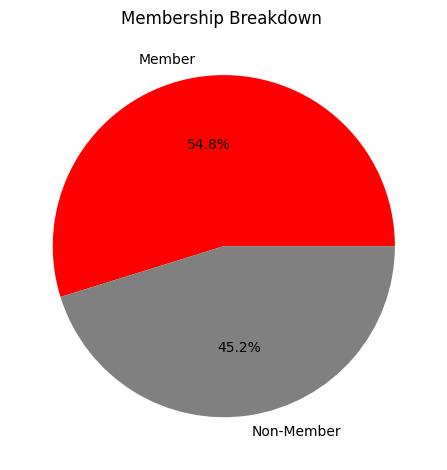

In [ ]:
users = data['membership']

plt.pie(users.value_counts(), labels=['Member', 'Non-Member'], colors=['red', 'grey'], autopct="%1.1f%%")

plt.title('Membership Breakdown ')
plt.tight_layout()
plt.show()

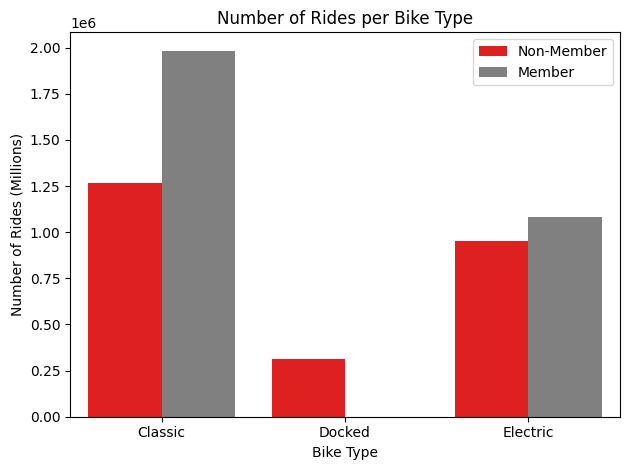

In [ ]:
ride_user_grp = data.groupby(['membership','rideable_type'])['ride_id'].count().reset_index(name='count')

# Map rideable_type to new labels
rideable_type_map = {
    'classic_bike': 'Classic',
    'docked_bike': 'Docked',
    'electric_bike': 'Electric'
}
ride_user_grp['rideable_type'] = ride_user_grp['rideable_type'].map(rideable_type_map)

ax = sns.barplot(data=ride_user_grp,x='rideable_type',y='count',hue='membership',palette=['red', 'grey'],hue_order=['Non-Member','Member'])

plt.ylabel('Number of Rides (Millions)')
plt.xlabel('Bike Type')

plt.legend()
plt.title('Number of Rides per Bike Type')
plt.tight_layout()

plt.show()

**Top Stations**

In [ ]:
import plotly.express as px

# Sample data
df_sample = data.sample(n=5000)

# Create the scatter map
fig_1 = px.scatter_mapbox(df_sample, lat='start_lat', lon='start_lng', color='membership', opacity=1, zoom=9,
                          color_discrete_sequence=['grey', 'red'], title='User clustering')

# Update the layout to use 'carto-positron' mapbox style
fig_1.update_layout(mapbox_style='carto-positron', width=600, height=800, title='Bike Station Locations by Membership',  title_x=0.5, legend_title="Membership")

# Show the plot
fig_1.show()

In [ ]:
#import libraries for maps
import folium
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

In [ ]:
df_sample = data.sample(n=5000)

fig_1 = px.density_mapbox(df_sample, lat='start_lat', lon='start_lng', radius=10,
                          zoom=9, title='User clustering')

fig_1.update_layout(mapbox_style='carto-positron',  width=600, height=800, title = 'Bike Station Locations', title_x=0.5)

fig_1.show()


In [ ]:
#calculate the most frequent start stations
top_start_stations = (data.groupby(['start_station_name', 'membership'])['start_station_name']
                      .count()
                      .reset_index(name='count')
                      .sort_values(by=['membership','count'],ascending=[True,False])
                      .groupby('membership')
                      .head(10))
top_start_stations = top_start_stations.assign(type_station='start')
top_start_stations = top_start_stations.rename(columns={'start_station_name': 'station'})

In [ ]:
#calculate the most frequent end stations
top_end_stations = (data.groupby(['end_station_name', 'membership'])['start_station_name']
                      .count()
                      .reset_index(name='count')
                      .sort_values(by=['membership','count'],ascending=[True,False])
                      .groupby('membership')
                      .head(10))
top_end_stations = top_end_stations.assign(type_station='end')
top_end_stations = top_end_stations.rename(columns={'end_station_name': 'station'})

In [ ]:
top_stations = pd.concat([top_start_stations,top_end_stations])

In [ ]:
top_stations['station'].value_counts()

,count
station,
Wells St & Concord Ln,4
Wells St & Elm St,3
Clark St & Elm St,2
Streeter Dr & Grand Ave,2
Lake Shore Dr & Monroe St,2
Theater on the Lake,2
Shedd Aquarium,2
Michigan Ave & Oak St,2
Millennium Park,2


In [ ]:
#import libraries for maps
import folium
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

In [ ]:
geolocator = Nominatim(user_agent="my_app")

In [ ]:
chicago_location = [41.8781136, -87.6297982]

# Create the map object centered on Chicago
map_osm = folium.Map(location=chicago_location, zoom_start=13, width=600, height = 800)

# Group the dataframe by 'station'
grouped_stations = top_stations.groupby('station')

# Iterate through the grouped stations and add a marker for each one to the map
for station, station_data in grouped_stations:
    if (station_data['membership']=='Member').any() and (station_data['membership']=='Non-Member').any():
        color = 'darkblue'
    elif (station_data['membership']=='Member').any():
        color = 'red'
    elif (station_data['membership']=='Non-Member').any():
        color = 'lightgray'
    else:
        color = 'black'

    location = geolocator.geocode(station+" Chicago, IL")
    if location:
        folium.Marker([location.latitude, location.longitude],
                      popup=station,
                      icon=folium.Icon(color=color)).add_to(map_osm)

# Display the map
map_osm

**Time of Year (Month, Hour, Weekday vs Weekend)**

Day of Week

In [ ]:
member_day = pd.pivot_table(data, values = 'ride_id', index = 'day', columns = 'membership', aggfunc='count')

In [ ]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
member_day = member_day.reindex(index=day_order)

In [ ]:
fig_2 = px.bar(member_day, barmode = 'group', width = 600, height = 800, color_discrete_sequence=['grey', 'red'])
fig_2.update_layout(title = 'Number of Rides by Day', title_x=0.5, legend_title="Membership", xaxis_title = "Day", yaxis_title = "Count of Rides")
fig_2.show()

Hour of Day

In [ ]:
#filter data
weekday_data = data.loc[(data['day'] != 'Saturday') & (data['day'] != 'Sunday')]
weekend_data = data.loc[(data['day'] == 'Saturday') | (data['day'] == 'Sunday')]

In [ ]:
#weekdays
member_hour_weekday = pd.pivot_table(weekday_data, values = 'ride_id', index = 'hour', columns = 'membership', aggfunc='count')
fig_9 = px.line(member_hour_weekday, markers=True, color_discrete_sequence=['grey', 'red'])
fig_9.update_layout(title = 'Time of Ride (Hour)', legend_title="Membership", width = 800, height = 600, title_x=0.5, xaxis_title = 'Hour', yaxis_title = 'Count of Rides')
fig_9.show()

In [ ]:
#weekends
member_hour_weekend = pd.pivot_table(weekend_data, values = 'ride_id', index = 'hour', columns = 'membership', aggfunc='count')
fig_3 = px.line(member_hour_weekend, markers=True, color_discrete_sequence=['grey', 'red'])
fig_3.update_layout(title = 'Time of Ride (Hour)', legend_title="Membership", width = 800, height = 600, title_x=0.5, xaxis_title = 'Hour', yaxis_title = 'Count of Rides')
fig_3.show()

In [ ]:
member_time_of_day = pd.pivot_table(data, values = 'ride_id', index = 'time_of_day', columns = 'membership', aggfunc='count')

In [ ]:
time_of_day_order = ['Morning', 'Afternoon', 'Evening', 'Night']
member_time_of_day = member_time_of_day.reindex(index=time_of_day_order)

In [ ]:
fig_4 = px.bar(member_time_of_day, barmode = 'group', color_discrete_sequence=['grey', 'red'])
fig_4.update_layout(title = 'Rides by Time of Day', legend_title="Membership", width = 800, height = 600, title_x=0.5, xaxis_title = 'Time of Day', yaxis_title = 'Count of Rides')

Month

In [ ]:
member_month = pd.pivot_table(data, values = 'ride_id', index = 'month', columns = 'membership', aggfunc='count')

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
member_month = member_month.reindex(index=month_order)

In [ ]:
fig_5 = px.bar(member_month, barmode = 'group', color_discrete_sequence=['grey', 'red'])
fig_5.update_layout(title = 'Rides by Month', legend_title="Membership", width = 800, height = 600, title_x=0.5, xaxis_title = 'Month', yaxis_title = 'Count of Rides')

**Ride Duration**

Ride duration vs member type

In [ ]:
compare_ride = pd.pivot_table(data, values='ride_length_min', index='membership')
fig_6 = px.bar(compare_ride, color_discrete_map={'ride_length_min': 'red'})
fig_6.update_layout(legend_title="Variable", title="Ride Duration by Membership", title_x=0.50,
                    yaxis_title='Duration of Ride (Minutes)', xaxis_title='Membership',
                    width=800, height=600, showlegend=False)

ride duration per month

In [ ]:
#ride length per day and month
compare_ride = pd.pivot_table(data, values = 'ride_length_min', index = 'month', columns = 'membership')
month_order =  ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
compare_ride = compare_ride.reindex(index=month_order)

In [ ]:
fig_7 = px.bar(compare_ride, barmode = 'group', color_discrete_sequence=['grey', 'red'])
fig_7.update_layout(legend_title="Membership", title="Ride Duration per Month by Membership", title_x=0.50,
                    yaxis_title='Duration of Ride (Minutes)', xaxis_title='Membership',
                    width=800, height=600)

In [ ]:
#ride duration per day of the week
member_day = pd.pivot_table(data, values = 'ride_length', index = 'day', columns = 'membership')
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
member_day = member_day.reindex(index=day_order)

In [ ]:
fig_8 = px.bar(member_day, barmode = 'group', color_discrete_sequence=['grey', 'red'])
fig_8.update_layout(legend_title="Membership", title="Ride Duration per Day by Membership", title_x=0.50,
                    yaxis_title='Duration of Ride (Minutes)', xaxis_title='Membership',
                    width=800, height=600)